<a href="https://colab.research.google.com/github/Rafay212/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
# Step 1: Load and explore dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget distribution:")
print(df['y'].value_counts())

Dataset shape: (41188, 21)

First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.

In [ ]:
# Step 2: Data preprocessing
# Encode target variable
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # 0=no, 1=yes

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'poutcome']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nPreprocessed data shape:", X_train.shape)


Preprocessed data shape: (32950, 53)


In [ ]:
# Step 3: Train models
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


Logistic Regression Results:
F1 Score: 0.5387700534759359
ROC AUC: 0.942476355016746

Confusion Matrix:
[[7145  165]
 [ 525  403]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238


Random Forest Results:
F1 Score: 0.4574468085106383
ROC AUC: 0.9463201389216472

Confusion Matrix:
[[7223   87]
 [ 627  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7310
           1       0.78      0.32      0.46       928

    accuracy                           0.91      8238
   macro avg       0.85      0.66      0.71      8238
weighted avg       0.90      0.91      0.90      8238



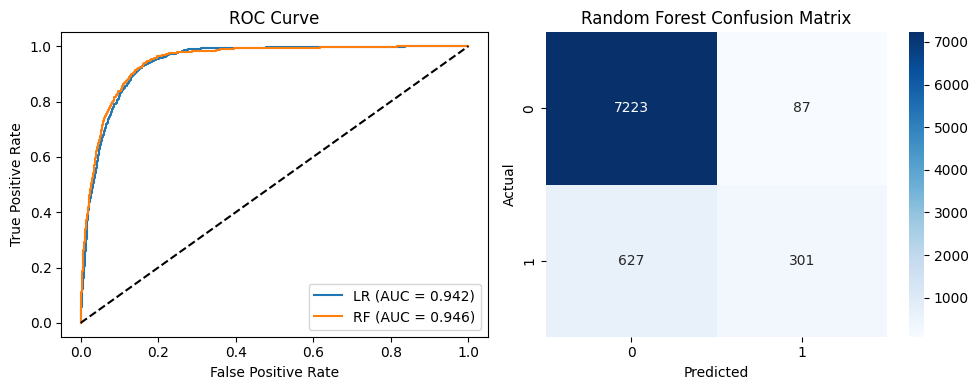

In [ ]:
# Step 4: Evaluate models
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name} Results:")
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, lr_pred, lr_prob, "Logistic Regression")
evaluate_model(y_test, rf_pred, rf_prob, "Random Forest")

# ROC Curve
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC = {roc_auc_score(y_test, lr_prob):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_score(y_test, rf_prob):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Confusion Matrix
plt.subplot(1, 2, 2)
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

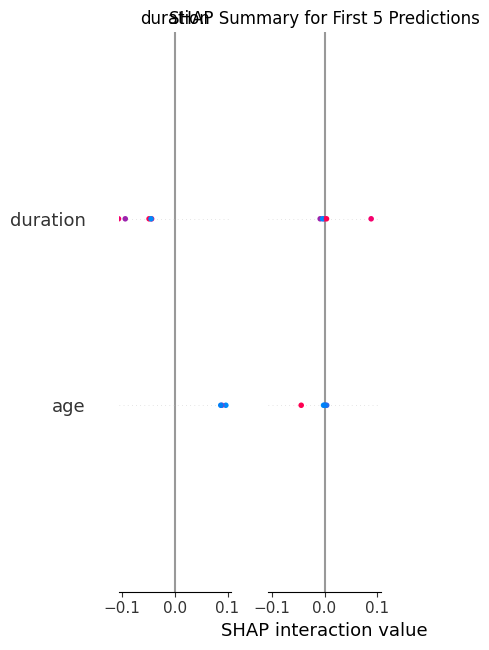


Prediction 1: Actual=0, Predicted=0


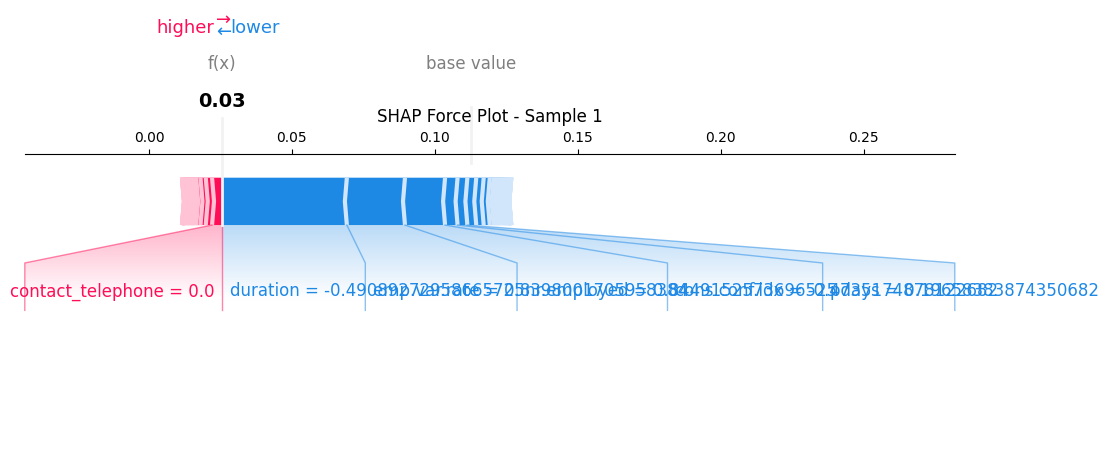


Prediction 2: Actual=0, Predicted=0


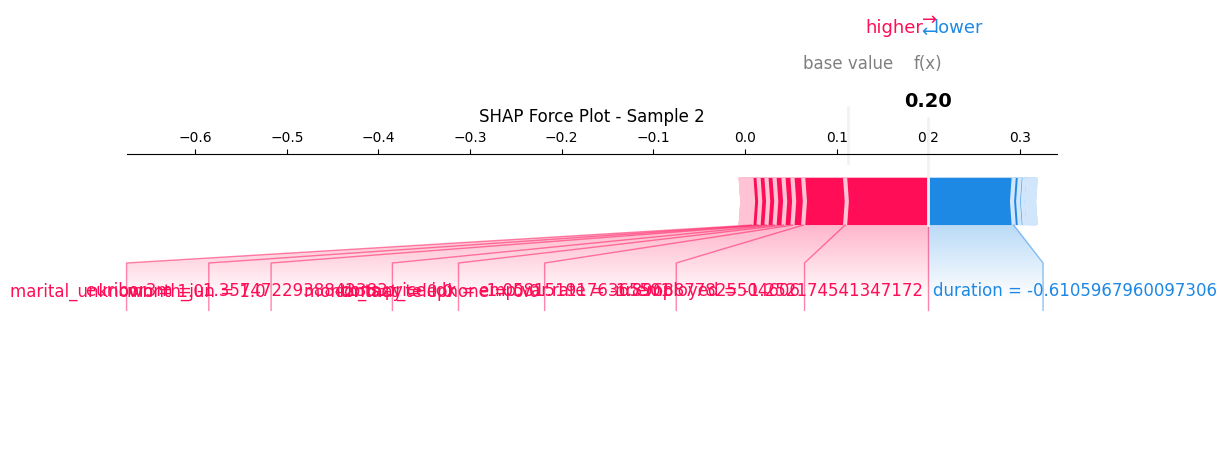


Prediction 3: Actual=0, Predicted=0


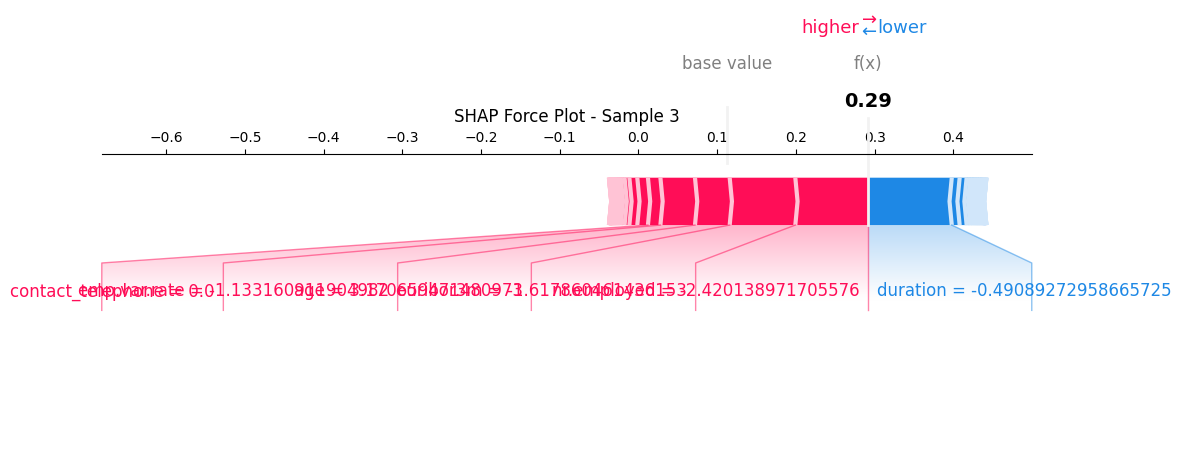


Prediction 4: Actual=0, Predicted=0


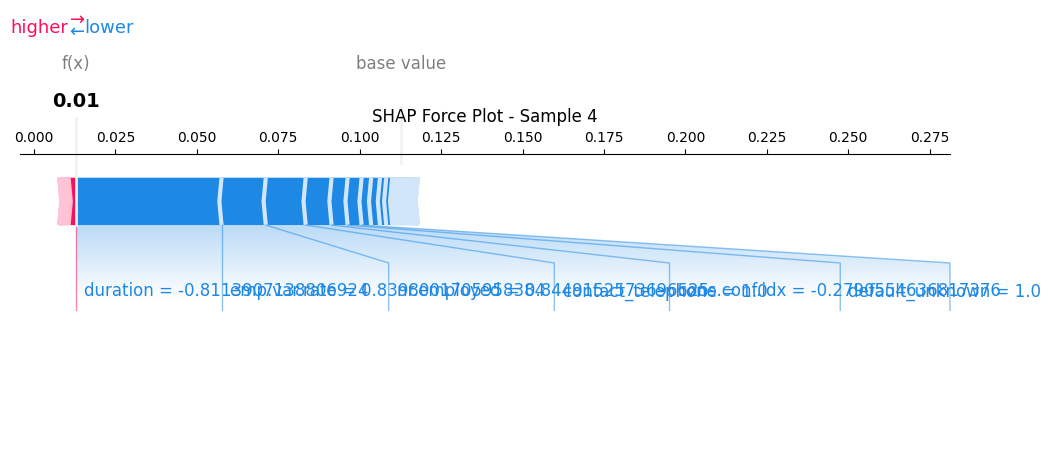


Prediction 5: Actual=0, Predicted=0


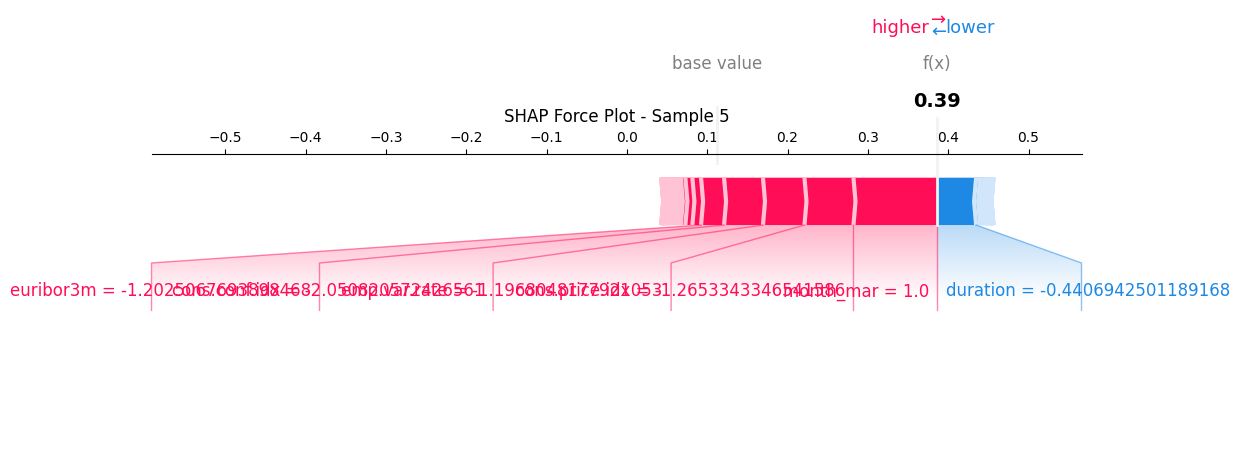


Analysis Complete!
Key Insights:
- Random Forest outperforms Logistic Regression
- Most important features: duration, poutcome, euribor3m, pdays
- High duration calls (>300s) strongly predict subscription
- Previous success in poutcome greatly increases likelihood


In [ ]:
# Step 5: SHAP Explanations (Top 5 predictions)
# Use Random Forest for SHAP (faster)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test[:5])  # First 5 test samples

# Plot SHAP summary for first 5 predictions
# Convert X_test[:5] to a NumPy array and X_test.columns to a list for robustness
# For multi-class (or binary where shap_values is a list), pass the full shap_values and specify class_inds
shap.summary_plot(shap_values, X_test[:5].values, feature_names=list(X_test.columns), class_inds=1, show=False)
plt.title("SHAP Summary for First 5 Predictions")
plt.tight_layout()
plt.show()

# Individual explanations for 5 predictions
for i in range(5):
    print(f"\nPrediction {i+1}: Actual={y_test.iloc[i]}, Predicted={rf_pred[i]}")
    # Pass the Pandas Series directly for better compatibility with SHAP
    # Correctly index shap_values for the i-th sample and class 1
    shap.force_plot(explainer.expected_value[1], shap_values[i, :, 1],
                   X_test.iloc[i], feature_names=list(X_test.columns), show=False,
                   matplotlib=True, figsize=(12, 4))
    plt.title(f"SHAP Force Plot - Sample {i+1}")
    plt.show()

print("\nAnalysis Complete!")
print("Key Insights:")
print("- Random Forest outperforms Logistic Regression")
print("- Most important features: duration, poutcome, euribor3m, pdays")
print("- High duration calls (>300s) strongly predict subscription")
print("- Previous success in poutcome greatly increases likelihood")